<a href="https://colab.research.google.com/github/drawcodeboy/Cat_n_Dog_Classification/blob/main/ver1_cat_n_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
# 데이터 불러오기
# Dataset 출처 (https://www.kaggle.com/datasets/tongpython/cat-and-dog)
# 구글 드라이브에 업로드하여 사용

train_path = '/content/drive/MyDrive/cat_n_dog/training_set/training_set'
test_path = '/content/drive/MyDrive/cat_n_dog/test_set/test_set'

#os.listdir()
>* 해당 경로에 몇 개의 파일 또는 디렉터리가 존재하는지 확인
#os.endswith()
>* 특정 확장자를 지정(문자열)을 지정하여 어떤 파일 특정 확장자로 끝나는지 확인

In [ ]:
print(os.listdir(train_path))
print(os.listdir(test_path))

['cats', 'dogs']
['cats', 'dogs']


# plt.imread()


(-0.5, 497.5, 414.5, -0.5)

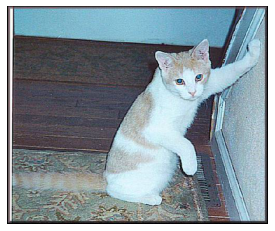

In [ ]:
# test_set에서 그림 불러오기
plt.imshow(plt.imread('/content/drive/MyDrive/cat_n_dog/test_set/test_set/cats/cat.4001.jpg'))
plt.axis('off')

# os.walk()
>* 하위의 폴더들을 for문으로 탐색할 수 있게 한다. 인자로 전달된 path에 대해 3개의 값이 있는 tuple을 넘겨준다.
>* first(root): dir과 files가 있는 path
>* second(dirs): root 아래에 있는 폴더들
>* third(files): root 아래에 있는 파일들
# os.path.join()
>* 인수에 전달된 2개의 문자열을 결합하여, 1개의 경로로 할 수있다.

https://codechacha.com/ko/python-walk-files/

In [ ]:
test_list = [] # test_set의 파일 경로들을 담은 리스트
test_target = []

for dirname, _, filenames in os.walk(test_path):
    #print(filenames)
    for filename in filenames:
        #print(filename)
        if(filename.endswith('jpg')): # 확장자가 jpg인 것만 담아주기
            if(filename[0] == 'c'):
                test_target.append(0)
            elif(filename[0] == 'd'):
                test_target.append(1)
            test_count = os.path.join(dirname, filename)
            test_list.append(test_count)

In [ ]:
train_list = []
train_target = []

for dirname, _, filenames in os.walk(train_path):
    for filename in filenames:
        if(filename.endswith('jpg')):
            if(filename[0] == 'c'):
                train_target.append(0)
            elif(filename[0] == 'd'):
                train_target.append(1)
            train_count = os.path.join(dirname, filename)
            train_list.append(train_count)

(-0.5, 328.5, 499.5, -0.5)

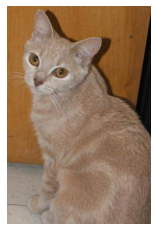

In [ ]:
plt.imshow(plt.imread(train_list[1]))
plt.axis('off')

# 경로에서 이미지 데이터 가져오기 (Try 1)

## PIL(pillow) 모듈 : 이미지 처리 모듈
>* Image 패키지
>* Image.open(path)를 통해 그림을 가져와서 numpy로 바꿀 수 있다. -> 너무 오래 걸림
>* https://ddolcat.tistory.com/690

In [ ]:
# 이미지 10개 정도 train_set에서 순차적으로 골라서 shape 확인
"""
fig, ax = plt.subplots(2, 5)

for i, jpg_path in enumerate(train_list):
    if(i == 10):
        break
    img = Image.open(jpg_path)
    ax[i // 5][i % 5].imshow(img)
    img_array = np.array(img)
    print(img_array.shape)

plt.show()
"""
# 이미지마다 shape가 각각 다 다르다 -> 같게 해줄 필요가 있다.

'\nfig, ax = plt.subplots(2, 5)\n\nfor i, jpg_path in enumerate(train_list):\n    if(i == 10):\n        break\n    img = Image.open(jpg_path)\n    ax[i // 5][i % 5].imshow(img)\n    img_array = np.array(img)\n    print(img_array.shape)\n\nplt.show()\n'

In [ ]:
# 경로에서 PIL을 통해 Image를 가져와서 넘파이로 변환 후, train_set에 넣는 작업을 시도함

# >> 이 방식은 너무 오래 걸림
"""
train_set = []

for i, jpg_path in enumerate(train_list):
    print('counting... {}'.format(i))
    img = Image.open(jpg_path)
    img_array = np.array(img)
    train_set.append(img_array)

test_set = []

for i, jpg_path in enumerate(test_list):
    print('counting... {}'.format(i))
    img = Image.open(jpg_path)
    img_array = np.array(img)
    test_set.append(img_array)
"""

"\ntrain_set = []\n\nfor i, jpg_path in enumerate(train_list):\n    print('counting... {}'.format(i))\n    img = Image.open(jpg_path)\n    img_array = np.array(img)\n    train_set.append(img_array)\n\ntest_set = []\n\nfor i, jpg_path in enumerate(test_list):\n    print('counting... {}'.format(i))\n    img = Image.open(jpg_path)\n    img_array = np.array(img)\n    test_set.append(img_array)\n"

# 경로에서 이미지 데이터 가져오기 (Try 2)
##Keras로 이미지 데이터 불러오기

>* image.load_img(경로 문자열, 사이즈)
>* 불러오면서 resize까지 시켜서 편함

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=baek2sm&logNo=221400912923

In [ ]:
# get Data from Path and Transform(Resize)
# 이것도 오래 걸림

"""
from tensorflow.keras.preprocessing import image

train_set = []

for i, f in enumerate(train_list):
    img = image.load_img(f, target_size = (224, 224, 3)) # 반환형 <class 'PIL.Image.Image'>
    #print('count {}'.format(i))
    img_np = np.array(img)
    train_set.append(img_np)
"""

"\nfrom tensorflow.keras.preprocessing import image\n\ntrain_set = []\n\nfor i, f in enumerate(train_list):\n    img = image.load_img(f, target_size = (224, 224, 3)) # 반환형 <class 'PIL.Image.Image'>\n    #print('count {}'.format(i))\n    img_np = np.array(img)\n    train_set.append(img_np)\n"

In [ ]:
"""
test_set = []

for f in test_list:
    img = image.load_img(f, target_size=(224, 224, 3))
    img_np = np.array(img)
    test_set.append(img)
"""

'\ntest_set = []\n\nfor f in test_list:\n    img = image.load_img(f, target_size=(224, 224, 3))\n    img_np = np.array(img)\n    test_set.append(img)\n'

# 경로에서 이미지 데이터 가져오기 (Try 3)
## tf.keras.preprocessing.image_dataset_from_directory

>* 4초만에 끝..

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    directory = train_path,
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 123, # train과 val을 분리할 때, seed 값이 다르면 다른 분할을 택하므로 겹치는 데이터가 생긴다.
    validation_split=0.02, # 2%만 validation set으로 이용
    subset = 'training' # 해당 subset(dataset, 함수를 통해 나온 set)은 training 용으로 사용
)

Found 8005 files belonging to 2 classes.
Using 7845 files for training.


<BatchDataset에서 Numpy로 Type Casting>

https://stackoverflow.com/questions/57791851/cast-tensorflow-2-0-batchdataset-to-numpy-array

In [ ]:
val_ds = image_dataset_from_directory(
    directory = '/content/drive/MyDrive/cat_n_dog/training_set/training_set',
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE,
    seed = 123,
    validation_split=0.02,
    subset = 'validation'
)

Found 8005 files belonging to 2 classes.
Using 160 files for validation.


image_dataset_from_directory

https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

batchdataset to numpy array reference

https://stackoverflow.com/questions/57791851/cast-tensorflow-2-0-batchdataset-to-numpy-array



In [ ]:
val_np = list(val_ds)

In [ ]:
val_np[0]

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[181.76785   , 166.76785   , 161.76785   ],
          [182.67857   , 167.67857   , 162.67857   ],
          [183.50415   , 168.50415   , 163.50415   ],
          ...,
          [113.64518   ,  95.84401   ,  55.24752   ],
          [113.62222   ,  95.62222   ,  56.92291   ],
          [106.982216  ,  88.982216  ,  50.982212  ]],
 
         [[181.74251   , 166.74251   , 161.74251   ],
          [182.75894   , 167.75894   , 162.75894   ],
          [183.92682   , 168.92682   , 163.92682   ],
          ...,
          [107.54811   ,  89.54811   ,  52.208775  ],
          [111.70547   ,  92.857254  ,  59.401894  ],
          [103.66973   ,  84.82152   ,  51.366158  ]],
 
         [[187.91965   , 172.91965   , 167.91965   ],
          [187.0821    , 172.0821    , 167.0821    ],
          [185.00589   , 170.00589   , 165.00589   ],
          ...,
          [ 97.18716   ,  78.18716   ,  46.347874  ],
          [108.74111   , 

In [ ]:
import numpy as np

len(val_np)
len(val_np[0])
img = np.array(val_np[0][0][-1]/255.0)

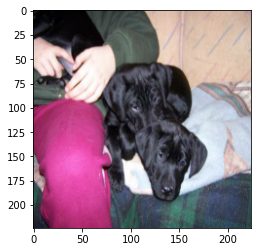

In [ ]:
plt.imshow(img)
plt.show()

# Pytorch ImageFolder
>* cat이랑 dog split하는 방법 찾다가 pytorch ImageFolder 사용하는 법
>* => 파일 받아올 때 해결해버림 (안 씀)

https://ndb796.tistory.com/373

https://dacon.io/codeshare/4750

## 쓴 방법
>* 애초에 데이터 경로를 받아오는 train_list, test_list에서 받는 과정에 경로가 'c'로 시작하면 target에 0을, 'd'로 시작하면 target에 1을 넣도록 처리해뒀다.

In [ ]:
"""
# train, validation SPLIT

from sklearn.model_selection import train_test_split

train_set, val_set, train_target, val_target = train_test_split(
    train_set, train_target, test_size=0.02, random_state=42
)
"""

'\n# train, validation SPLIT\n\nfrom sklearn.model_selection import train_test_split\n\ntrain_set, val_set, train_target, val_target = train_test_split(\n    train_set, train_target, test_size=0.02, random_state=42\n)\n'

# Modeling

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding = 'same', input_shape=(224, 224, 3)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 1000)              2

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_ds, epochs=20, validation_data=(val_ds),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
246/246 [==============================] - 1099s 4s/step - loss: 34.7626 - accuracy: 0.5145 - val_loss: 0.6879 - val_accuracy: 0.5500
Epoch 2/20
246/246 [==============================] - 31s 124ms/step - loss: 0.6613 - accuracy: 0.5892 - val_loss: 0.7497 - val_accuracy: 0.5000
Epoch 3/20
246/246 [==============================] - 28s 112ms/step - loss: 0.5290 - accuracy: 0.7020 - val_loss: 0.9533 - val_accuracy: 0.5750


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/cat_n_dog/test_set/test_set',
    labels = 'inferred',
    label_mode = 'binary',
    batch_size = BATCH_SIZE,
    image_size = IMAGE_SIZE
)

Found 2023 files belonging to 2 classes.


In [ ]:
eval = model.evaluate(test_ds)

64/64 [==============================] - 297s 4s/step - loss: 0.6844 - accuracy: 0.5551


In [ ]:
print(eval)

[0.6843922138214111, 0.5551161766052246]


## version 2와 비교를 위해 version 2에서 구현한 print_predict 사용

In [ ]:
def print_predict(sample_):
    result = model.predict(sample_)
    result = result[0][0]


    print('RESULT: ', end='')
    if(result < 0.5):
        print('Cat')
    elif(result > 0.5):
        print('Dog')
    else:
        print('Can\'t know')

In [ ]:
import cv2

def crop_center(img):
    y, x, z = img.shape
    crop_size = min(y, x)

    start_x = x // 2 - (crop_size // 2)
    start_y = y // 2 - (crop_size // 2)
    img = img[start_y:start_y + crop_size, start_x:start_x + crop_size]
    if crop_size < 224: # 확대 할 때, 바이큐빅 보간법
        return cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    elif crop_size > 224: # 축소할 때, 영역 보간법
        return cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
    else:
        return img

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_fun(sample_path):
    sample = image.load_img(sample_path)
    sample_np = np.array(sample, dtype=np.float32)
    sample_np_crop = crop_center(sample_np)
    sample_ = sample_np_crop.reshape(1, 224, 224, 3)

    print_predict(sample_)
    plt.imshow(sample)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 86ms/step
RESULT: Cat


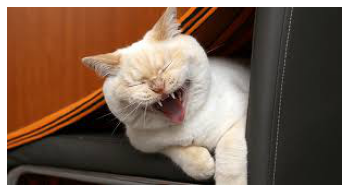

1/1 [==============================] - 0s 23ms/step
RESULT: Cat


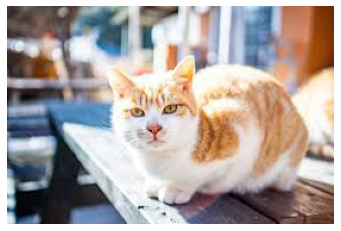

1/1 [==============================] - 0s 63ms/step
RESULT: Cat


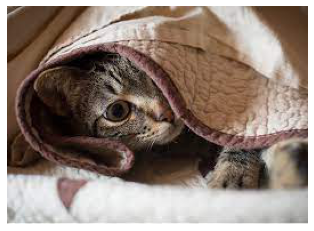

1/1 [==============================] - 0s 49ms/step
RESULT: Dog


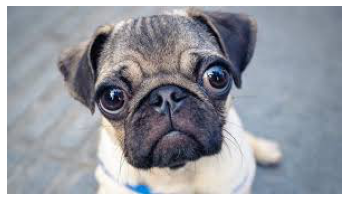

1/1 [==============================] - 0s 19ms/step
RESULT: Dog


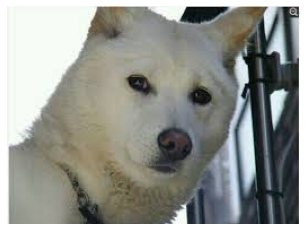

1/1 [==============================] - 0s 18ms/step
RESULT: Dog


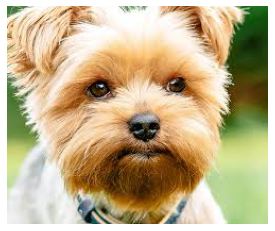

1/1 [==============================] - 0s 17ms/step
RESULT: Cat


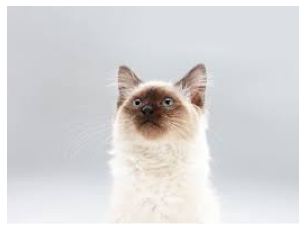

1/1 [==============================] - 0s 21ms/step
RESULT: Cat


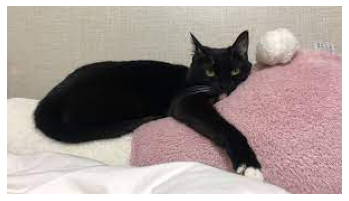

1/1 [==============================] - 0s 17ms/step
RESULT: Dog


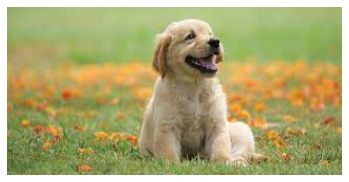

1/1 [==============================] - 0s 19ms/step
RESULT: Cat


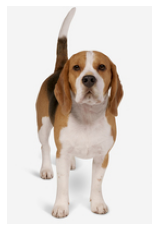

In [ ]:
no_dataset_path = '/content/drive/MyDrive/cat_n_dog/no_dataset'

for dirname, _, filenames in os.walk(no_dataset_path):
    for filename in filenames:
        no_data_path = os.path.join(dirname, filename)
        predict_fun(no_data_path)

In [ ]:
model.save('ver1_cat_n_dog_model.h5')